# Load dataset

In [ ]:
!wget https://storage.googleapis.com/deepmind-media/Datasets/kinetics700_2020.tar.gz

--2021-02-27 19:30:08--  https://storage.googleapis.com/deepmind-media/Datasets/kinetics700_2020.tar.gz
Resolving storage.googleapis.com (storage.googleapis.com)... 64.233.189.128, 108.177.125.128, 74.125.203.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|64.233.189.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 25342182 (24M) [application/x-gzip]
Saving to: ‘kinetics700_2020.tar.gz’

kinetics700_2020.ta 100%[===================>]  24.17M  49.1MB/s    in 0.5s    

2021-02-27 19:30:09 (49.1 MB/s) - ‘kinetics700_2020.tar.gz’ saved [25342182/25342182]



In [ ]:
import tarfile

tar = tarfile.open('kinetics700_2020.tar.gz', "r:gz")
tar.extractall()
tar.close()

[ERROR: IOPub data rate exceeded](https://stackoverflow.com/questions/50689784/in-google-collab-i-get-iopub-data-rate-exceeded)

[CSV](https://www.programiz.com/python-programming/reading-csv-files)

In [ ]:
import os
import csv
import numpy as np

file_path = '/content/kinetics700_2020'

data_train = []
label_train = []
data_test = []
label_test = []

fname = 'train.csv'
with open(os.path.join(file_path,fname)) as file:
  reader = csv.reader(file)
  for i,row in enumerate(reader):
    if i == 0: # Ignore the header
      continue
    else:
      dict_temp = {'url': row[1], 'time': list(map(float,row[2:4]))}
      data_train.append(dict_temp)
      label_train.append(row[0])
    
# Print the first 10 elements
print(data_train[:10])
print(label_train[:10])


# Use validation dataset as test set
fname = 'validate.csv'
with open(os.path.join(file_path,fname)) as file:
  reader = csv.reader(file)
  for i,row in enumerate(reader):
    if i == 0:
      continue
    else:
      dict_temp = {'url': row[1], 'time': list(map(float,row[2:4]))}
      data_test.append(dict_temp)
      label_test.append(row[0])

label_train = np.array(label_train)
label_test = np.array(label_test)

[{'url': '---0dWlqevI', 'time': [19.0, 29.0]}, {'url': '---aQ-tA5_A', 'time': [9.0, 19.0]}, {'url': '---j12rm3WI', 'time': [14.0, 24.0]}, {'url': '--07WQ2iBlw', 'time': [1.0, 11.0]}, {'url': '--0NTAs-fA0', 'time': [29.0, 39.0]}, {'url': '--0l35AkU34', 'time': [68.0, 78.0]}, {'url': '--33Lscn6sk', 'time': [4.0, 14.0]}, {'url': '--3OAstUWtU', 'time': [45.0, 55.0]}, {'url': '--3lTx87ebQ', 'time': [23.0, 33.0]}, {'url': '--3ouPhoy2A', 'time': [20.0, 30.0]}]
['clay pottery making', 'news anchoring', 'using bagging machine', 'javelin throw', 'climbing a rope', 'sipping cup', 'flipping pancake', 'tickling', 'watering plants', 'eating spaghetti']


# Action: bandaging


In [ ]:
'''
  We are NOT modifying the stored original train data and train label,

  data_train, label_train,

  only working with indices and save the result to new arrays or lists
'''

target_label = 'bandaging'

# Get indices of 'bandaging' in training set
indices = np.where(label_train == target_label)[0]


train_raw = [] # Store raw info of train data: url & time
y_train = [] # Store train data labels

for idx in indices:
  train_raw.append(data_train[idx]) # Target class raw info
  y_train.append(1) # Target class label = 1

np.random.seed(0)
# Randomly shuffle the indices of all training data
shuffled_indices_total = np.random.permutation(len(data_train))
# Delete the indices of 'bandaging' in training set
shuffled_indices_0 = shuffled_indices_total[~np.isin(
    shuffled_indices_total,indices
)]


# Append the rest of the training samples to train_raw,
# equal number of label 0 as label 1 (target)
# Indices already shuffled, so this is in random order
for i in range(len(indices)):
  train_raw.append(data_train[shuffled_indices_0[i]])
  y_train.append(0)

'''
  Do the same thing for test set
'''
indices_test = np.where(label_test == target_label)[0]

test_raw = []
y_test = []

# Target class in validation set
for idx in indices_test:
  test_raw.append(data_test[idx])
  y_test.append(1)

np.random.seed(0)
shuffled_indices_test = np.random.permutation(len(data_test))
shuffled_indices_test_0 = shuffled_indices_test[~np.isin(
    shuffled_indices_test,indices_test
)]


for i in range(len(indices_test)):
  test_raw.append(data_test[shuffled_indices_test_0[i]])
  y_test.append(0)

In [ ]:
!pip install --upgrade youtube_dl

     |████████████████████████████████| 1.9MB 5.3MB/s 


Make directory for the Kinetics dataset

In [ ]:
import os

# Directory for the Kinetics dataset
kinetics_dir = '/content/kinetics'
os.mkdir(kinetics_dir)

# Directory for train and test set for Kinetics
train_dir = os.path.join(kinetics_dir,'train')
os.mkdir(train_dir)
test_dir = os.path.join(kinetics_dir,'test')
os.mkdir(test_dir)

# Directory for target and supplementary classes
train_target_dir = os.path.join(train_dir,'target')
os.mkdir(train_target_dir)
train_others_dir = os.path.join(train_dir,'others')
os.mkdir(train_others_dir)
test_target_dir = os.path.join(test_dir,'target')
os.mkdir(test_target_dir)
test_others_dir = os.path.join(test_dir,'others')
os.mkdir(test_others_dir)

Import specific part of video from YouTube

In [ ]:
import youtube_dl, subprocess
import datetime
import time

'''
  Training and validation set
'''

for i, info in enumerate(train_raw):
  if info['url'][0] != '=':
    info['url'] = '=' + info['url']
  
  URL = 'https://www.youtube.com/watch?v' + info['url'] # url of YouTube video
  FROM = str(datetime.timedelta(seconds=info['time'][0]))
  LENGTH = str(datetime.timedelta(seconds=(info['time'][1]-info['time'][0])))
  if y_train[i] == 1:
    TARGET = os.path.join(train_target_dir,"bandaging.{}.mp4".format(i))
  else:
    TARGET = os.path.join(train_others_dir,"others.{}.mp4".format(
        i - y_train.count(1)
    ))
  
  with youtube_dl.YoutubeDL({'format': 'best'}) as ydl:
    try:
      result = ydl.extract_info(URL, download=False)
      video = result['entries'][0] if 'entries' in result else result
    except:
      continue
    
  url = video['url']
  time.sleep(1)
  subprocess.call(['ffmpeg', '-i', url, '-ss', FROM, '-t', LENGTH, 
                   '-c:v', 'copy', '-c:a', 'copy', TARGET,])  


In [ ]:
import youtube_dl, subprocess
import datetime

'''
  Test set
'''
for i, info in enumerate(test_raw):
  if info['url'][0] != '=':
    info['url'] = '=' + info['url']
  
  URL = 'https://www.youtube.com/watch?v' + info['url'] # url of YouTube video
  FROM = str(datetime.timedelta(seconds=info['time'][0]))
  LENGTH = str(datetime.timedelta(seconds=(info['time'][1]-info['time'][0])))
  if y_test[i] == 1:
    TARGET = os.path.join(test_target_dir,"bandaging.{}.mp4".format(i))
  else:
    TARGET = os.path.join(test_others_dir,"others.{}.mp4".format(
        i - y_test.count(1)
    ))
  
  with youtube_dl.YoutubeDL({'format': 'best'}) as ydl:
    try:
      result = ydl.extract_info(URL, download=False)
      video = result['entries'][0] if 'entries' in result else result
    except:
      continue
    
  url = video['url']
  subprocess.call(['ffmpeg', '-i', url, '-ss', FROM, '-t', LENGTH, 
                   '-c:v', 'copy', '-c:a', 'copy', TARGET,])  

Download videos from Google Colab

In [ ]:
!zip -r /content/file.zip /content/kinetics

In [ ]:
from google.colab import files
files.download("/content/file.zip")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

# Load videos from Drive + preprocess

*   Section all videos frame by frame
*   Preprocess videos

Video frame generator

[Keras video frame generator](https://medium.com/smileinnovation/training-neural-network-with-image-sequence-an-example-with-video-as-input-c3407f7a0b0f)

In [ ]:
!pip install keras-video-generators

In [ ]:
import keras
import keras_video.utils
from keras_video import VideoFrameGenerator

classes = ['target' , 'others']
# some global params
SIZE = (112, 112)
CHANNELS = 3
NFRAME = 25
BS = 10
# pattern to get videos and classes
glob_pattern='/content/drive/MyDrive/kinetics/train/{classname}/*.mp4'
# Data augmentation
data_aug = keras.preprocessing.image.ImageDataGenerator(
    zoom_range=.1,
    horizontal_flip=True,
    rotation_range=8,
    width_shift_range=.2,
    height_shift_range=.2)
# Create video frame generator
train = VideoFrameGenerator(
    classes=classes, 
    glob_pattern=glob_pattern,
    nb_frames=NFRAME,
    split_val=0.2,  # 20% of the videos will be used as validation set. 
    shuffle=True,
    batch_size=BS,
    target_shape=SIZE,
    nb_channel=CHANNELS,
    transformation=data_aug,
    use_frame_cache=True)

val = train.get_validation_generator()

# keras_video.utils.show_sample(train)

# Build model and train the network

## Build model

In [ ]:
import keras
from keras import backend
from keras.layers import TimeDistributed
from keras.layers import Conv2D, MaxPool2D
from keras.layers import Dense, Dropout
from keras.layers import LSTM, GlobalMaxPool2D
from keras.models import Sequential
from keras.optimizers import Adam, RMSprop
from keras.layers import BatchNormalization
from keras.utils.vis_utils import plot_model
from keras.applications import InceptionV3

# The pretrained network we will use
conv_base = InceptionV3(weights='imagenet',
                  include_top=False,
                  input_shape=(112, 112, 3))
conv_base.trainable = False

def action_model(shape=(NFRAME, 112, 112, 3), outputs=2):
    
    # Flatten output of conv_base
    model0 = Sequential()
    model0.add(conv_base)
    model0.add(GlobalMaxPool2D())
    # Build our model for training
    model = Sequential()
    model.add(TimeDistributed(model0, input_shape=shape))
    # LSTM for time series
    model.add(LSTM(64))
    # Build the classifier
    # model.add(Dense(1024, activation='relu'))
    # model.add(Dropout(.5))
    model.add(Dense(512, activation='relu'))
    model.add(Dropout(.5))
    model.add(Dense(128, activation='relu'))
    model.add(Dropout(.5))
    model.add(Dense(64, activation='relu'))
    model.add(Dense(outputs, activation='sigmoid'))
    return model

INSHAPE=(NFRAME,) + SIZE + (CHANNELS,) # (15, 112, 112, 3)
model = action_model(INSHAPE, len(classes))

model.summary()


Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
time_distributed_3 (TimeDist (None, 25, 2048)          21802784  
_________________________________________________________________
lstm_3 (LSTM)                (None, 64)                540928    
_________________________________________________________________
dense_12 (Dense)             (None, 512)               33280     
_________________________________________________________________
dropout_6 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_13 (Dense)             (None, 128)               65664     
_________________________________________________________________
dropout_7 (Dropout)          (None, 128)               0         
_________________________________________________________________
dense_14 (Dense)             (None, 64)               

In [ ]:
optimizer= Adam(lr=1e-4)
model.compile(optimizer=optimizer , 
              loss='binary_crossentropy',
              metrics=['accuracy'])

## Train the network

In [ ]:
import time

callbacks = [
    keras.callbacks.ReduceLROnPlateau(
        monitor = 'val_loss',
        # factor = 0.1,
        # patience = 10,
    ),
    keras.callbacks.ModelCheckpoint(
        filepath = 'bandaging_Inception_try.h5',
        monitor = 'val_loss',
        save_best_only = True,
                 ),
]

start = time.time()
history = model.fit(
                    train,
                    steps_per_epoch = 20,
                    #batch_size= 10,
                    epochs = 30,
                    callbacks=callbacks,
                    validation_data= val,
                    validation_steps = 10,)
finish = time.time()
print("Total training time: ", finish - start)

Epoch 1/30
 4/20 [=====>........................] - ETA: 10s - loss: 0.6437 - accuracy: 0.8250

Frame count is not OK for video /content/drive/MyDrive/Colab Notebooks/Study/CSCE 636/Project/kinetics/train/others/others.121.mp4, 6 total, 5 extracted


20/20 [==============================] - 23s 867ms/step - loss: 0.6647 - accuracy: 0.6558 - val_loss: 0.6988 - val_accuracy: 0.4800
Epoch 2/30
12/20 [=================>............] - ETA: 5s - loss: 0.7056 - accuracy: 0.5134

Frame count is not OK for video /content/drive/MyDrive/Colab Notebooks/Study/CSCE 636/Project/kinetics/train/others/others.121.mp4, 6 total, 5 extracted


20/20 [==============================] - ETA: 0s - loss: 0.6994 - accuracy: 0.5284

Frame count is not OK for video /content/drive/MyDrive/Colab Notebooks/Study/CSCE 636/Project/kinetics/train/target/assembling computer.887.mp4, 0 total, 0 extracted


20/20 [==============================] - 15s 764ms/step - loss: 0.6990 - accuracy: 0.5291 - val_loss: 0.6946 - val_accuracy: 0.4747
Epoch 3/30
 1/20 [>.............................] - ETA: 14s - loss: 0.7338 - accuracy: 0.5000

Frame count is not OK for video /content/drive/MyDrive/Colab Notebooks/Study/CSCE 636/Project/kinetics/train/others/others.467.mp4, 0 total, 0 extracted


 2/20 [==>...........................] - ETA: 11s - loss: 0.7217 - accuracy: 0.5132

Frame count is not OK for video /content/drive/MyDrive/Colab Notebooks/Study/CSCE 636/Project/kinetics/train/others/others.155.mp4, 0 total, 0 extracted


20/20 [==============================] - ETA: 0s - loss: 0.6997 - accuracy: 0.5060

Frame count is not OK for video /content/drive/MyDrive/Colab Notebooks/Study/CSCE 636/Project/kinetics/train/target/assembling computer.887.mp4, 0 total, 0 extracted


20/20 [==============================] - 15s 760ms/step - loss: 0.6992 - accuracy: 0.5069 - val_loss: 0.6863 - val_accuracy: 0.4949
Epoch 4/30
10/20 [==============>...............] - ETA: 6s - loss: 0.6852 - accuracy: 0.5424

Frame count is not OK for video /content/drive/MyDrive/Colab Notebooks/Study/CSCE 636/Project/kinetics/train/others/others.783.mp4, 0 total, 0 extracted


20/20 [==============================] - ETA: 0s - loss: 0.6840 - accuracy: 0.5338

Frame count is not OK for video /content/drive/MyDrive/Colab Notebooks/Study/CSCE 636/Project/kinetics/train/target/assembling computer.887.mp4, 0 total, 0 extracted


20/20 [==============================] - 15s 759ms/step - loss: 0.6837 - accuracy: 0.5338 - val_loss: 0.6640 - val_accuracy: 0.5200
Epoch 5/30
20/20 [==============================] - ETA: 0s - loss: 0.6991 - accuracy: 0.4184

Frame count is not OK for video /content/drive/MyDrive/Colab Notebooks/Study/CSCE 636/Project/kinetics/train/others/others.796.mp4, 0 total, 0 extracted
Frame count is not OK for video /content/drive/MyDrive/Colab Notebooks/Study/CSCE 636/Project/kinetics/train/target/assembling computer.887.mp4, 0 total, 0 extracted


20/20 [==============================] - 15s 768ms/step - loss: 0.6981 - accuracy: 0.4235 - val_loss: 0.6554 - val_accuracy: 0.5354
Epoch 6/30
13/20 [==================>...........] - ETA: 4s - loss: 0.6863 - accuracy: 0.5225

Frame count is not OK for video /content/drive/MyDrive/Colab Notebooks/Study/CSCE 636/Project/kinetics/train/others/others.467.mp4, 0 total, 0 extracted


20/20 [==============================] - ETA: 0s - loss: 0.6806 - accuracy: 0.5314

Frame count is not OK for video /content/drive/MyDrive/Colab Notebooks/Study/CSCE 636/Project/kinetics/train/target/assembling computer.887.mp4, 0 total, 0 extracted


20/20 [==============================] - 15s 769ms/step - loss: 0.6800 - accuracy: 0.5329 - val_loss: 0.6243 - val_accuracy: 0.6263
Epoch 7/30
20/20 [==============================] - 15s 766ms/step - loss: 0.6693 - accuracy: 0.6075 - val_loss: 0.6207 - val_accuracy: 0.7600
Epoch 8/30
 4/20 [=====>........................] - ETA: 10s - loss: 0.6520 - accuracy: 0.4750

Frame count is not OK for video /content/drive/MyDrive/Colab Notebooks/Study/CSCE 636/Project/kinetics/train/others/others.121.mp4, 6 total, 5 extracted


20/20 [==============================] - 15s 767ms/step - loss: 0.6284 - accuracy: 0.6207 - val_loss: 0.5597 - val_accuracy: 0.7900
Epoch 9/30
 1/20 [>.............................] - ETA: 14s - loss: 0.6311 - accuracy: 0.8000

Frame count is not OK for video /content/drive/MyDrive/Colab Notebooks/Study/CSCE 636/Project/kinetics/train/others/others.796.mp4, 0 total, 0 extracted


14/20 [====================>.........] - ETA: 4s - loss: 0.6083 - accuracy: 0.7284

Frame count is not OK for video /content/drive/MyDrive/Colab Notebooks/Study/CSCE 636/Project/kinetics/train/others/others.151.mp4, 0 total, 0 extracted


19/20 [===========================>..] - ETA: 0s - loss: 0.6033 - accuracy: 0.7255

Frame count is not OK for video /content/drive/MyDrive/Colab Notebooks/Study/CSCE 636/Project/kinetics/train/others/others.121.mp4, 6 total, 5 extracted


20/20 [==============================] - ETA: 0s - loss: 0.6023 - accuracy: 0.7252

Frame count is not OK for video /content/drive/MyDrive/Colab Notebooks/Study/CSCE 636/Project/kinetics/train/target/assembling computer.887.mp4, 0 total, 0 extracted


20/20 [==============================] - 15s 760ms/step - loss: 0.6015 - accuracy: 0.7250 - val_loss: 0.4661 - val_accuracy: 0.8889
Epoch 10/30
20/20 [==============================] - 15s 773ms/step - loss: 0.6035 - accuracy: 0.7839 - val_loss: 0.4777 - val_accuracy: 0.8900
Epoch 11/30
17/20 [========================>.....] - ETA: 2s - loss: 0.5508 - accuracy: 0.7813

Frame count is not OK for video /content/drive/MyDrive/Colab Notebooks/Study/CSCE 636/Project/kinetics/train/others/others.467.mp4, 0 total, 0 extracted


20/20 [==============================] - 15s 762ms/step - loss: 0.5450 - accuracy: 0.7862 - val_loss: 0.3949 - val_accuracy: 0.9100
Epoch 12/30
 1/20 [>.............................] - ETA: 14s - loss: 0.3675 - accuracy: 1.0000

Frame count is not OK for video /content/drive/MyDrive/Colab Notebooks/Study/CSCE 636/Project/kinetics/train/others/others.155.mp4, 0 total, 0 extracted


20/20 [==============================] - ETA: 0s - loss: 0.4853 - accuracy: 0.8477

Frame count is not OK for video /content/drive/MyDrive/Colab Notebooks/Study/CSCE 636/Project/kinetics/train/target/assembling computer.887.mp4, 0 total, 0 extracted


20/20 [==============================] - 15s 767ms/step - loss: 0.4860 - accuracy: 0.8471 - val_loss: 0.4184 - val_accuracy: 0.8889
Epoch 13/30
11/20 [===============>..............] - ETA: 6s - loss: 0.5486 - accuracy: 0.7554

Frame count is not OK for video /content/drive/MyDrive/Colab Notebooks/Study/CSCE 636/Project/kinetics/train/others/others.783.mp4, 0 total, 0 extracted


13/20 [==================>...........] - ETA: 4s - loss: 0.5430 - accuracy: 0.7583

Frame count is not OK for video /content/drive/MyDrive/Colab Notebooks/Study/CSCE 636/Project/kinetics/train/others/others.796.mp4, 0 total, 0 extracted


20/20 [==============================] - ETA: 0s - loss: 0.5354 - accuracy: 0.7620

Frame count is not OK for video /content/drive/MyDrive/Colab Notebooks/Study/CSCE 636/Project/kinetics/train/target/assembling computer.887.mp4, 0 total, 0 extracted


20/20 [==============================] - 15s 759ms/step - loss: 0.5345 - accuracy: 0.7620 - val_loss: 0.3576 - val_accuracy: 0.9192
Epoch 14/30
20/20 [==============================] - ETA: 0s - loss: 0.4291 - accuracy: 0.8641

Frame count is not OK for video /content/drive/MyDrive/Colab Notebooks/Study/CSCE 636/Project/kinetics/train/target/assembling computer.887.mp4, 0 total, 0 extracted


20/20 [==============================] - 15s 764ms/step - loss: 0.4286 - accuracy: 0.8646 - val_loss: 0.2636 - val_accuracy: 0.9293
Epoch 15/30
20/20 [==============================] - ETA: 0s - loss: 0.3682 - accuracy: 0.8913

Frame count is not OK for video /content/drive/MyDrive/Colab Notebooks/Study/CSCE 636/Project/kinetics/train/target/assembling computer.887.mp4, 0 total, 0 extracted


20/20 [==============================] - 16s 796ms/step - loss: 0.3676 - accuracy: 0.8910 - val_loss: 0.2591 - val_accuracy: 0.9394
Epoch 16/30
 1/20 [>.............................] - ETA: 14s - loss: 0.2757 - accuracy: 0.9000

Frame count is not OK for video /content/drive/MyDrive/Colab Notebooks/Study/CSCE 636/Project/kinetics/train/others/others.796.mp4, 0 total, 0 extracted


 5/20 [======>.......................] - ETA: 9s - loss: 0.2791 - accuracy: 0.9012 

Frame count is not OK for video /content/drive/MyDrive/Colab Notebooks/Study/CSCE 636/Project/kinetics/train/others/others.467.mp4, 0 total, 0 extracted


20/20 [==============================] - 15s 764ms/step - loss: 0.3347 - accuracy: 0.8533 - val_loss: 0.2106 - val_accuracy: 0.9300
Epoch 17/30
16/20 [=======================>......] - ETA: 2s - loss: 0.3718 - accuracy: 0.8737

Frame count is not OK for video /content/drive/MyDrive/Colab Notebooks/Study/CSCE 636/Project/kinetics/train/others/others.155.mp4, 0 total, 0 extracted


20/20 [==============================] - 15s 755ms/step - loss: 0.3596 - accuracy: 0.8724 - val_loss: 0.1413 - val_accuracy: 0.9600
Epoch 18/30
11/20 [===============>..............] - ETA: 6s - loss: 0.3751 - accuracy: 0.8302

Frame count is not OK for video /content/drive/MyDrive/Colab Notebooks/Study/CSCE 636/Project/kinetics/train/others/others.467.mp4, 0 total, 0 extracted


20/20 [==============================] - ETA: 0s - loss: 0.3638 - accuracy: 0.8281

Frame count is not OK for video /content/drive/MyDrive/Colab Notebooks/Study/CSCE 636/Project/kinetics/train/target/assembling computer.887.mp4, 0 total, 0 extracted


20/20 [==============================] - 15s 763ms/step - loss: 0.3632 - accuracy: 0.8280 - val_loss: 0.2762 - val_accuracy: 0.9293
Epoch 19/30
 5/20 [======>.......................] - ETA: 10s - loss: 0.3996 - accuracy: 0.8517

Frame count is not OK for video /content/drive/MyDrive/Colab Notebooks/Study/CSCE 636/Project/kinetics/train/others/others.155.mp4, 0 total, 0 extracted


12/20 [=================>............] - ETA: 5s - loss: 0.3456 - accuracy: 0.8797

Frame count is not OK for video /content/drive/MyDrive/Colab Notebooks/Study/CSCE 636/Project/kinetics/train/others/others.783.mp4, 0 total, 0 extracted


18/20 [==========================>...] - ETA: 1s - loss: 0.3369 - accuracy: 0.8792

Frame count is not OK for video /content/drive/MyDrive/Colab Notebooks/Study/CSCE 636/Project/kinetics/train/others/others.682.mp4, 0 total, 0 extracted


20/20 [==============================] - 15s 759ms/step - loss: 0.3325 - accuracy: 0.8812 - val_loss: 0.2872 - val_accuracy: 0.9000
Epoch 20/30
 8/20 [===========>..................] - ETA: 8s - loss: 0.4461 - accuracy: 0.7714

Frame count is not OK for video /content/drive/MyDrive/Colab Notebooks/Study/CSCE 636/Project/kinetics/train/others/others.759.mp4, 0 total, 0 extracted


10/20 [==============>...............] - ETA: 6s - loss: 0.4419 - accuracy: 0.7798

Frame count is not OK for video /content/drive/MyDrive/Colab Notebooks/Study/CSCE 636/Project/kinetics/train/others/others.155.mp4, 0 total, 0 extracted


20/20 [==============================] - 15s 771ms/step - loss: 0.4082 - accuracy: 0.8098 - val_loss: 0.2438 - val_accuracy: 0.9400
Epoch 21/30
15/20 [=====================>........] - ETA: 3s - loss: 0.2518 - accuracy: 0.9371

Frame count is not OK for video /content/drive/MyDrive/Colab Notebooks/Study/CSCE 636/Project/kinetics/train/others/others.155.mp4, 0 total, 0 extracted


18/20 [==========================>...] - ETA: 1s - loss: 0.2664 - accuracy: 0.9279

Frame count is not OK for video /content/drive/MyDrive/Colab Notebooks/Study/CSCE 636/Project/kinetics/train/others/others.151.mp4, 0 total, 0 extracted


20/20 [==============================] - ETA: 0s - loss: 0.2721 - accuracy: 0.9237

Frame count is not OK for video /content/drive/MyDrive/Colab Notebooks/Study/CSCE 636/Project/kinetics/train/target/assembling computer.887.mp4, 0 total, 0 extracted


20/20 [==============================] - 15s 760ms/step - loss: 0.2744 - accuracy: 0.9221 - val_loss: 0.2503 - val_accuracy: 0.8990
Epoch 22/30


Frame count is not OK for video /content/drive/MyDrive/Colab Notebooks/Study/CSCE 636/Project/kinetics/train/others/others.151.mp4, 0 total, 0 extracted


20/20 [==============================] - 15s 765ms/step - loss: 0.3181 - accuracy: 0.9084 - val_loss: 0.2049 - val_accuracy: 0.9500
Epoch 23/30
20/20 [==============================] - 15s 762ms/step - loss: 0.4090 - accuracy: 0.8021 - val_loss: 0.1672 - val_accuracy: 0.9500
Epoch 24/30


Frame count is not OK for video /content/drive/MyDrive/Colab Notebooks/Study/CSCE 636/Project/kinetics/train/others/others.796.mp4, 0 total, 0 extracted


20/20 [==============================] - 15s 759ms/step - loss: 0.3073 - accuracy: 0.8883 - val_loss: 0.2507 - val_accuracy: 0.9100
Epoch 25/30


Frame count is not OK for video /content/drive/MyDrive/Colab Notebooks/Study/CSCE 636/Project/kinetics/train/others/others.467.mp4, 0 total, 0 extracted


20/20 [==============================] - ETA: 0s - loss: 0.3680 - accuracy: 0.8603

Frame count is not OK for video /content/drive/MyDrive/Colab Notebooks/Study/CSCE 636/Project/kinetics/train/others/others.121.mp4, 6 total, 5 extracted


20/20 [==============================] - 15s 769ms/step - loss: 0.3644 - accuracy: 0.8617 - val_loss: 0.1783 - val_accuracy: 0.9200
Epoch 26/30
 3/20 [===>..........................] - ETA: 11s - loss: 0.4174 - accuracy: 0.8167

Frame count is not OK for video /content/drive/MyDrive/Colab Notebooks/Study/CSCE 636/Project/kinetics/train/others/others.155.mp4, 0 total, 0 extracted


10/20 [==============>...............] - ETA: 6s - loss: 0.3337 - accuracy: 0.8690

Frame count is not OK for video /content/drive/MyDrive/Colab Notebooks/Study/CSCE 636/Project/kinetics/train/others/others.783.mp4, 0 total, 0 extracted


15/20 [=====================>........] - ETA: 3s - loss: 0.3074 - accuracy: 0.8839

Frame count is not OK for video /content/drive/MyDrive/Colab Notebooks/Study/CSCE 636/Project/kinetics/train/others/others.682.mp4, 0 total, 0 extracted


20/20 [==============================] - 15s 765ms/step - loss: 0.2939 - accuracy: 0.8925 - val_loss: 0.2066 - val_accuracy: 0.9100
Epoch 27/30
15/20 [=====================>........] - ETA: 3s - loss: 0.2008 - accuracy: 0.9420

Frame count is not OK for video /content/drive/MyDrive/Colab Notebooks/Study/CSCE 636/Project/kinetics/train/others/others.759.mp4, 0 total, 0 extracted


20/20 [==============================] - ETA: 0s - loss: 0.2095 - accuracy: 0.9311

Frame count is not OK for video /content/drive/MyDrive/Colab Notebooks/Study/CSCE 636/Project/kinetics/train/target/assembling computer.887.mp4, 0 total, 0 extracted


20/20 [==============================] - 15s 765ms/step - loss: 0.2108 - accuracy: 0.9296 - val_loss: 0.2461 - val_accuracy: 0.8889


Frame count is not OK for video /content/drive/MyDrive/Colab Notebooks/Study/CSCE 636/Project/kinetics/train/others/others.682.mp4, 0 total, 0 extracted


Epoch 28/30
16/20 [=======================>......] - ETA: 2s - loss: 0.2879 - accuracy: 0.8735

Frame count is not OK for video /content/drive/MyDrive/Colab Notebooks/Study/CSCE 636/Project/kinetics/train/others/others.467.mp4, 0 total, 0 extracted


20/20 [==============================] - ETA: 0s - loss: 0.2811 - accuracy: 0.8795

Frame count is not OK for video /content/drive/MyDrive/Colab Notebooks/Study/CSCE 636/Project/kinetics/train/target/assembling computer.887.mp4, 0 total, 0 extracted


20/20 [==============================] - 15s 759ms/step - loss: 0.2800 - accuracy: 0.8804 - val_loss: 0.2320 - val_accuracy: 0.9200
Epoch 29/30
20/20 [==============================] - ETA: 0s - loss: 0.2279 - accuracy: 0.9130

Frame count is not OK for video /content/drive/MyDrive/Colab Notebooks/Study/CSCE 636/Project/kinetics/train/target/assembling computer.887.mp4, 0 total, 0 extracted


20/20 [==============================] - 15s 765ms/step - loss: 0.2277 - accuracy: 0.9136 - val_loss: 0.1826 - val_accuracy: 0.9293
Epoch 30/30
18/20 [==========================>...] - ETA: 1s - loss: 0.3229 - accuracy: 0.9055

Frame count is not OK for video /content/drive/MyDrive/Colab Notebooks/Study/CSCE 636/Project/kinetics/train/others/others.155.mp4, 0 total, 0 extracted
Frame count is not OK for video /content/drive/MyDrive/Colab Notebooks/Study/CSCE 636/Project/kinetics/train/others/others.759.mp4, 0 total, 0 extracted


20/20 [==============================] - 16s 805ms/step - loss: 0.3198 - accuracy: 0.9048 - val_loss: 0.2098 - val_accuracy: 0.9300
Total training time:  477.4473240375519


Plot the learning curve

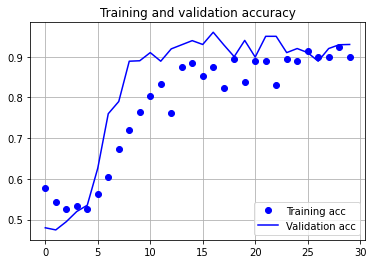

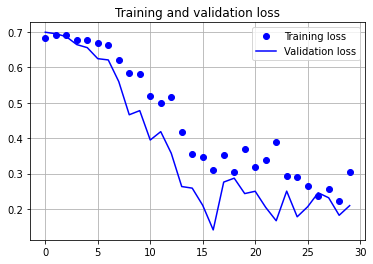

In [ ]:
import matplotlib.pyplot as plt
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.grid(axis='both')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.grid(axis='both')
plt.legend()

plt.show()

# Test on test set

In [ ]:
import keras
from keras.models import load_model

test_model = load_model('bandaging_Inception_try.h5')


In [ ]:
from keras_video import VideoFrameGenerator

classes = ['target' , 'others']
# some global params
SIZE = (112, 112)
CHANNELS = 3
NFRAME = 25
BS = 10
# pattern to get videos and classes
glob_pattern='/content/drive/MyDrive/kinetics/test/{classname}/*.mp4'

# Create video frame generator
test = VideoFrameGenerator(
    classes=classes, 
    glob_pattern=glob_pattern,
    nb_frames=NFRAME,
    shuffle=False,
    batch_size=BS,
    target_shape=SIZE,
    nb_channel=CHANNELS,
    use_frame_cache=True)

Total data: 2 classes for 92 files for train


In [ ]:
test_model.evaluate(test)

9/9 [==============================] - 65s 8s/step - loss: 0.2228 - accuracy: 0.9222


[0.2227592021226883, 0.9222221970558167]